In [8]:
!pip uninstall -y deepul_helper
# 
# import os
# os.chdir('cs294-158-ssl')

Found existing installation: deepul_helper 0.1.0
Uninstalling deepul_helper-0.1.0:
  Successfully uninstalled deepul_helper-0.1.0


Loading model for puzzle on cifar10
get_transform(cifar10, puzzle, True)
Files already downloaded and verified
get_transform(cifar10, puzzle, False)
Files already downloaded and verified


/Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl/deepul_helper/demos.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

(np.float64(-0.5), np.float64(95.5), np.float64(95.5), np.float64(-0.5))

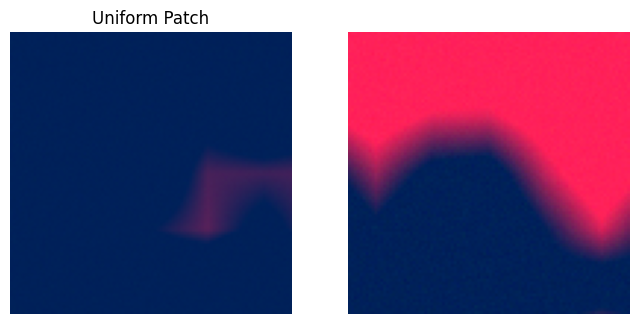

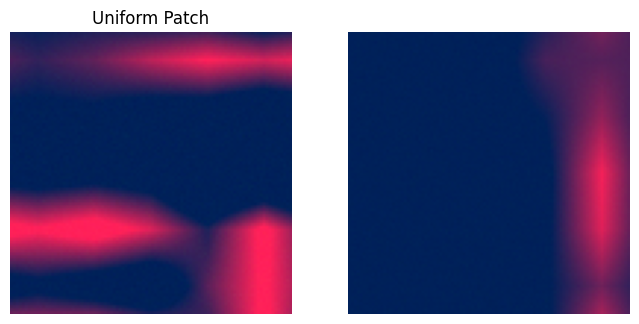

In [ ]:
!pip install matplotlib torch torchvision scikit-image opencv-python requests

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.9 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.7 MB/s eta 0:00:0000:0100:01
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 837.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 1.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.0 MB/s eta 0:00:00a 0:00:01


In [15]:
!pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (34 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.4.0-cp311-cp311-macosx_11_0_arm64.whl (118 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
import os 
os.chdir('.')
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting,evaluate_classifier
from deepul_helper.data import get_transform
%matplotlib inline

model, linear_classifier, train_loader, test_loader = load_model_and_data('puzzle')

# Get a single batch from the loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Select a single image from the batch
image = images[0]  # Shape: [C, H, W]

# Convert the image to the required format
image_np = image.permute(1, 2, 0).numpy()  # Convert from [C, H, W] to [H, W, C]

# Define `patch_dim` and `gap` if not set in your model
model.patch_dim = 96  # example value, adjust as per your requirement
model.gap = 4  # example value, adjust as needed

# Run the image through the model
output, output_fc6_uniform, output_fc6_random = model(image_np)

print("Model Output:", output)
print("Uniform Patch Embedding:", output_fc6_uniform)
print("Random Patch Embedding:", output_fc6_random)


-264 -264
-264 -264
-264 -264
-264 -264
-264 -264
-264 -264
-264 -264
-264 -264
-264 -264


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/yacineflici/Desktop/STG/.conda/lib/python3.11/site-packages/torch/utils/data/_utils/worker.py", line 351, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/yacineflici/Desktop/STG/.conda/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yacineflici/Desktop/STG/.conda/lib/python3.11/site-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl/deepul_helper/data.py", line 85, in __getitem__
    uniform_patch, random_patch, random_patch_label = self.get_patch_from_grid(image,
                                                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yacineflici/Documents/master-vmi/s3/IFLCM010 Analyse d'images/TP5/self-supervised-learning/cs294-158-ssl/deepul_helper/data.py", line 62, in get_patch_from_grid
    start_grid_x, start_grid_y = np.random.randint(0, offset_x), np.random.randint(0, offset_y)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "numpy/random/mtrand.pyx", line 798, in numpy.random.mtrand.RandomState.randint
  File "numpy/random/_bounded_integers.pyx", line 1334, in numpy.random._bounded_integers._rand_int64
ValueError: high <= 0
